In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('dataset_phishing.csv')

shape

In [2]:
data.shape

(11430, 89)

In [3]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [4]:
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


HANDLING MISSING VALUES

In [5]:
# Select numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numeric columns with the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


In [6]:
# Fill missing values in categorical columns with a placeholder or mode
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)  # Or use data[col].mode()[0] if you want to fill with the most frequent value


C:\Users\shaur\AppData\Local\Temp\ipykernel_14368\4172862055.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)  # Or use data[col].mode()[0] if you want to fill with the most frequent value


In [7]:
# Verify if there are any missing values
print(data.isnull().sum())


url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


Convert Categorical Features


If you have any categorical features, use encoding techniques like label encoding or one-hot encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'https_token' and other categorical columns are in the dataset
label_encoder = LabelEncoder()
data['https_token'] = label_encoder.fit_transform(data['https_token'])

# If you have other categorical columns, apply similar transformations


In [12]:
from sklearn.preprocessing import StandardScaler
# List of numerical columns that need scaling
numerical_features = [
    'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm',
    'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash',
    'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www',
    'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
    'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
    'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection',
    'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw',
    'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host',
    'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
    'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report',
    'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks',
    'nb_extCSS', 'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors',
    'login_form', 'external_favicon', 'links_in_tags', 'submit_email', 'ratio_intMedia', 'ratio_extMedia',
    'sfh', 'iframe', 'popup_window', 'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
    'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'domain_registration_length',
    'domain_age', 'web_traffic', 'dns_record', 'google_index', 'page_rank'
]

# Scale the numerical columns
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [13]:
# Automatically select numerical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Scale the numerical columns
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


Step 4: Define Features and Target Variable


The target variable is likely the column status, which indicates whether the URL is phishing (1) or safe (0).

In [14]:
# Define features and target
X = data.drop(['status', 'url'], axis=1)  # Features (remove 'url' column as it's not needed)
y = data['status']  # Target variable


Step 5: Split the Data into Training and Testing Sets

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 6: Build and Train the Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

  legitimate       0.96      0.98      0.97      1157
    phishing       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

Confusion Matrix:
[[1129   28]
 [  42 1087]]


Step 7: Hyperparameter Tuning (Optional)

You can tune hyperparameters using GridSearchCV to improve model performance

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10)
}

randomized_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=10, cv=3, n_jobs=-1, verbose=2)
randomized_search_rf.fit(X_train, y_train)

# Best parameters and model
print(f"Best parameters: {randomized_search_rf.best_params_}")
best_rf_model = randomized_search_rf.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'max_depth': 19, 'min_samples_split': 4, 'n_estimators': 239}


Step 8: Model Evaluation

Once the model is trained and tuned, evaluate its performance using appropriate metrics. You can use accuracy, precision, recall, F1-score, and AUC-ROC.

Matplotlib is building the font cache; this may take a moment.


Random Forest ROC-AUC: 0.9946449883751464


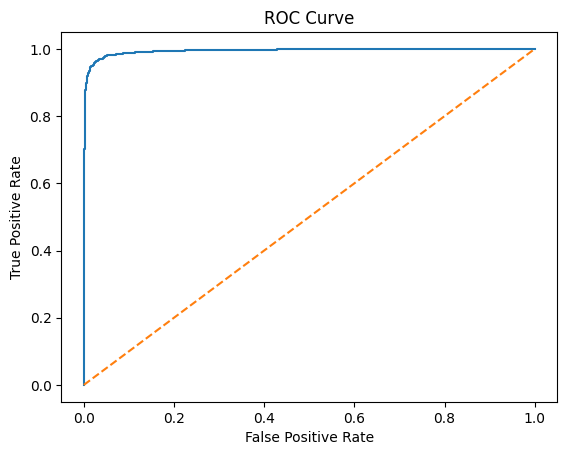

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode labels as numeric values (0 and 1)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Get probabilities (class 1 is the 'phishing' class)
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob_rf)
print(f"Random Forest ROC-AUC: {roc_auc}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob_rf)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Step 9: Save the Model

Once the model is trained, save it for later use in the browser extension.

In [30]:
import joblib

# Save the model to disk
joblib.dump(best_rf_model, 'phishing_detector_model.pkl')


['phishing_detector_model.pkl']

Step 10: Create a Flask API for Model Inference (for Browser Extension)

In [31]:
from flask import Flask, request, jsonify
import joblib

# Load the model
model = joblib.load('phishing_detector_model.pkl')
print("Model loaded successfully!")

# # Initialize Flask app
# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#     # data = request.get_json()
#     data = {"www.g00gle.com"}
#     # Assuming the data contains the same features as the dataset
#     features = [data['length_url'], data['length_hostname'], data['nb_dots'], ...]  # Fill with the correct features
#     prediction = model.predict([features])
#     return jsonify({'prediction': int(prediction[0])})

# if __name__ == '__main__':
#     app.run(debug=True,port=5001)


Model loaded successfully!
